This notebook tracks the covariance of cells across sessions.  One module saves all cells so that you can easily look at any comparison across successive days, but I also save freeze tuned cells only and the top cells from the 1st 3 PCs for ease.

In [1]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
import pandas as pd
from tqdm import tqdm

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

from session_directory import find_eraser_directory as get_dir
import er_plot_functions as erp
import Placefields as pf
import freezing_analysis as fa
import helpers 
import eraser_reference as err

# Project save directory here
print_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
save_dir = '/Users/nkinsky/Documents/BU/Working/Eraser'

In [2]:
# Helper functions to block printing output
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__


In [3]:
# Plot 1st PC across days for each mouse.
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']

for group, name in zip(group_plot, group_names):
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(16, 2.5))
        fig.suptitle(name + ' ' + mouse + ': PCA #0: Top wt cells (> 2SD) across days')
        for ida, (d1, d2, a) in enumerate(zip(day1, day2, ax)):
            cbar_bool = ida == 0
            try:
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                sig_pc0 = np.where(DRreg.DRbase.pca.df[0].abs() > DRreg.DRbase.pca.df[0].std()*2)[0]
                DRreg.plot_cov_across_days(neurons=sig_pc0, label='PC #0', ax=a, cbar=cbar_bool)

                # Clean up plots
                a.set_title('')
            except FileNotFoundError:
                a.text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                a.text(0.1, 0.5, 'ValueError - check out session')

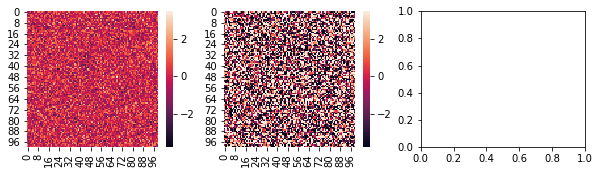

In [4]:
import matplotlib

def get_quadmesh(ax):
    """Grab QuadMesh children of a particular axes only"""
    quad_ind = np.where([isinstance(child, matplotlib.collections.QuadMesh) 
                 for child in ax.get_children()])[0][0]
        
    return ax.get_children()[quad_ind]

def set_clim(ax, ida):
    """Sets clim to for all plots in ax to that in ax[ida]"""
    quad_use = get_quadmesh(ax[ida])
    clim_use = quad_use.get_clim()
    for a in ax.reshape(-1):
        try:
            quad_set = get_quadmesh(a)
            quad_set.set_clim(clim_use)
        except IndexError:
            pass
        
# Unit test for above
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots(1, 3, figsize=(10, 2.5))
sns.heatmap(np.random.randn(100, 100), ax=ax2[0])
sns.heatmap(np.random.randn(100,100)*5, ax=ax2[1])
set_clim(ax2, 0)

Marble29 PC #4:: 100%|████████████████████████████████████| 3/3 [00:00<00:00,  3.19it/s]


KeyboardInterrupt: 

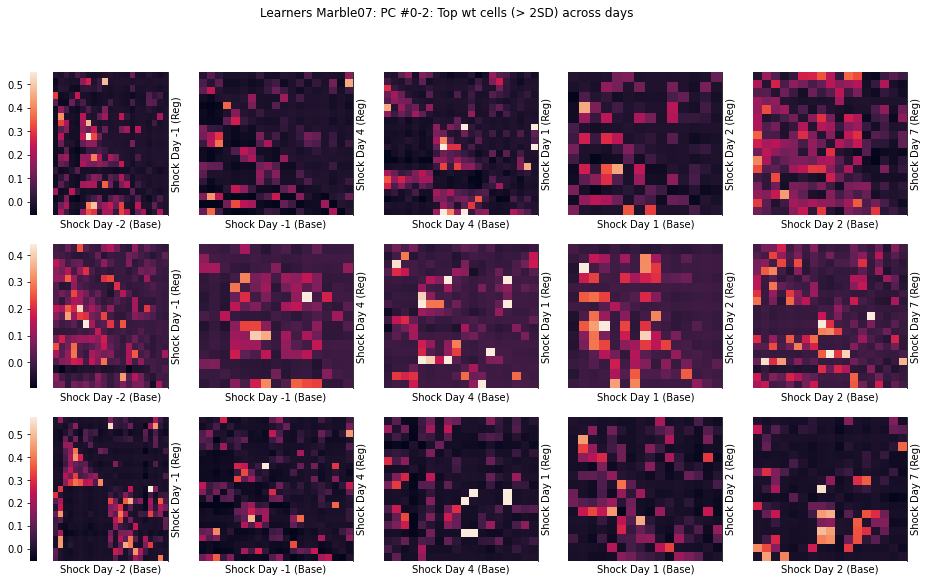

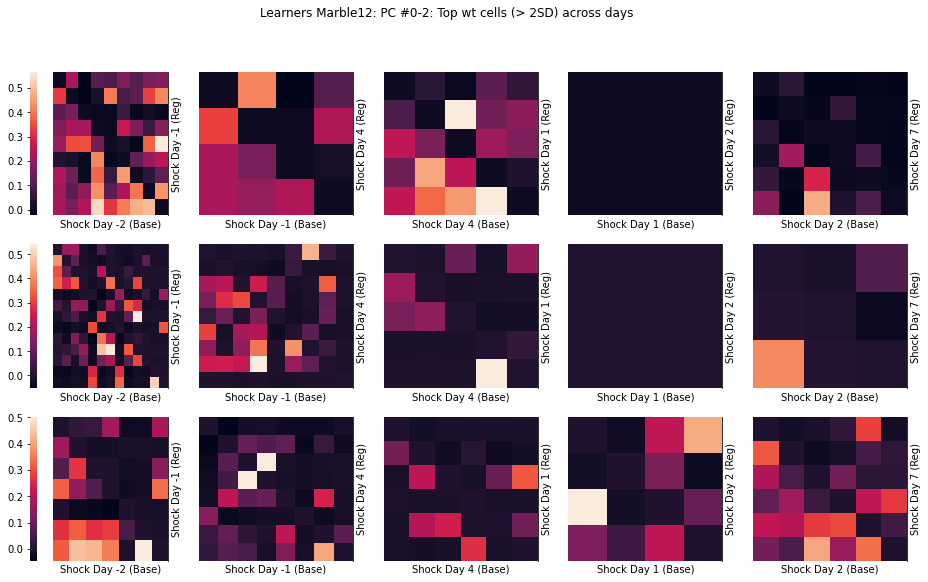

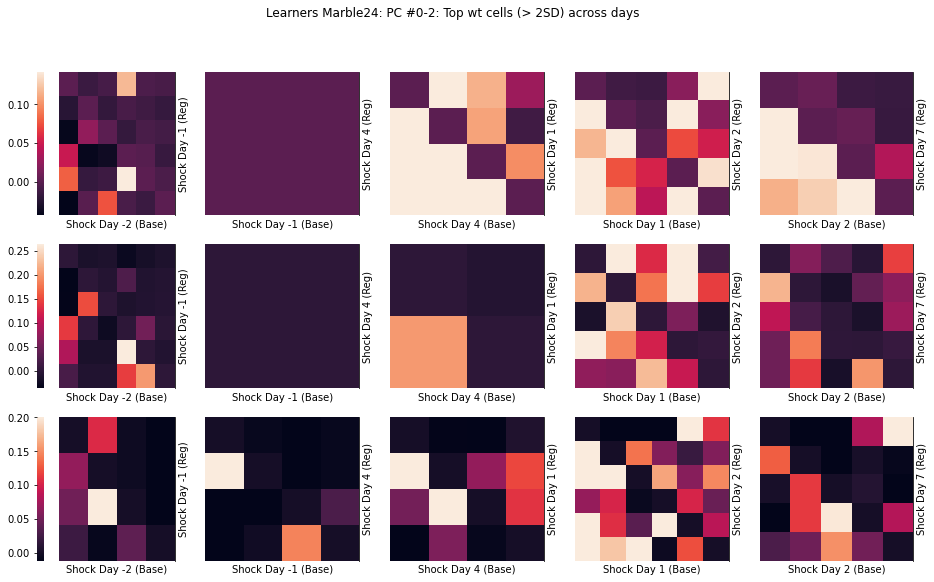

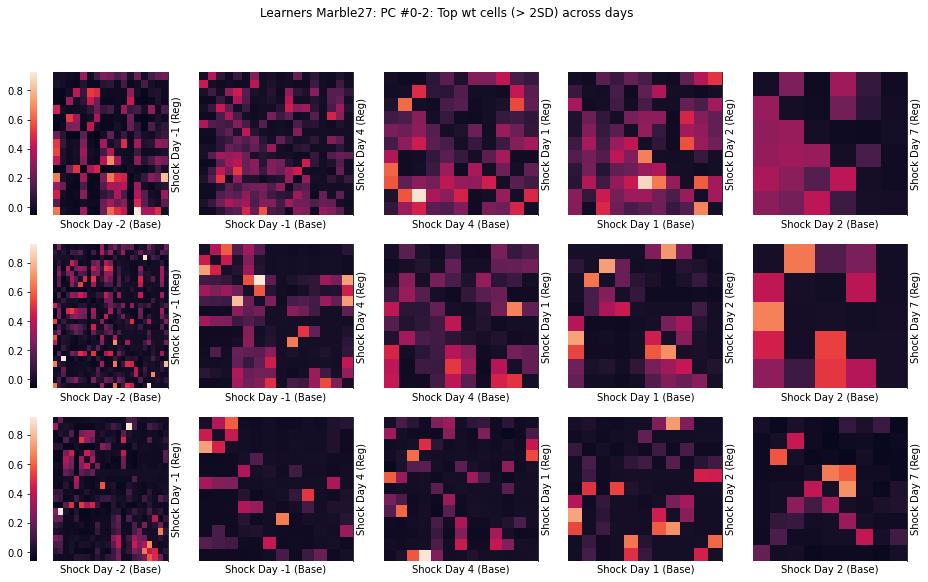

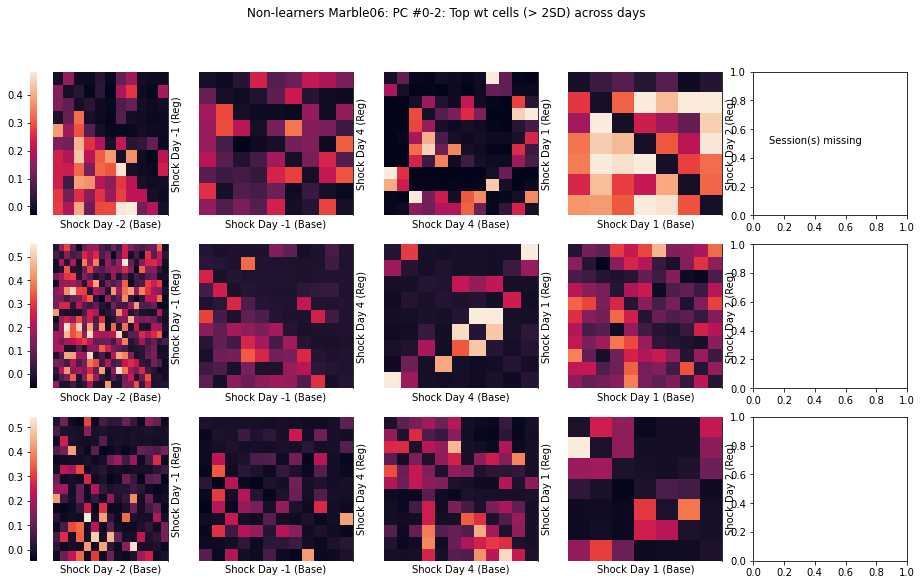

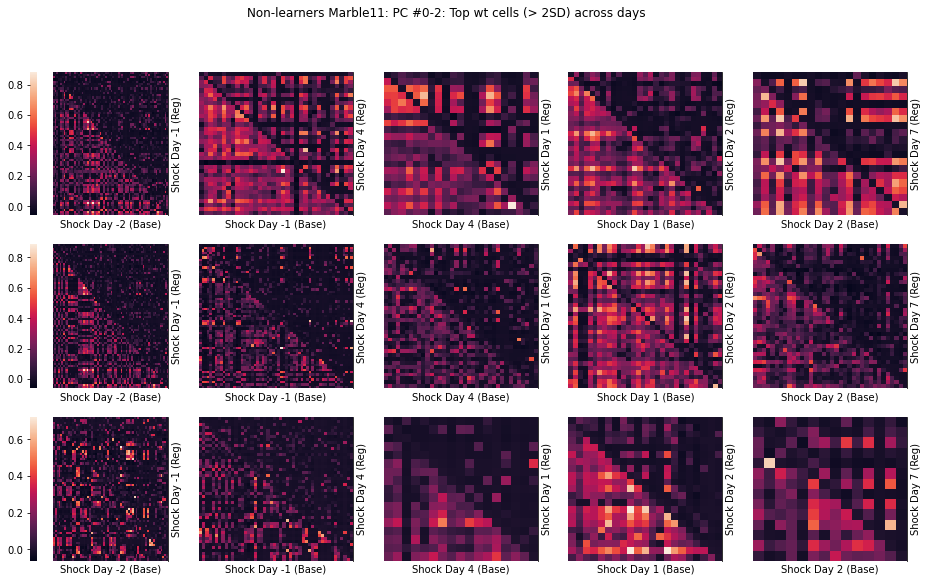

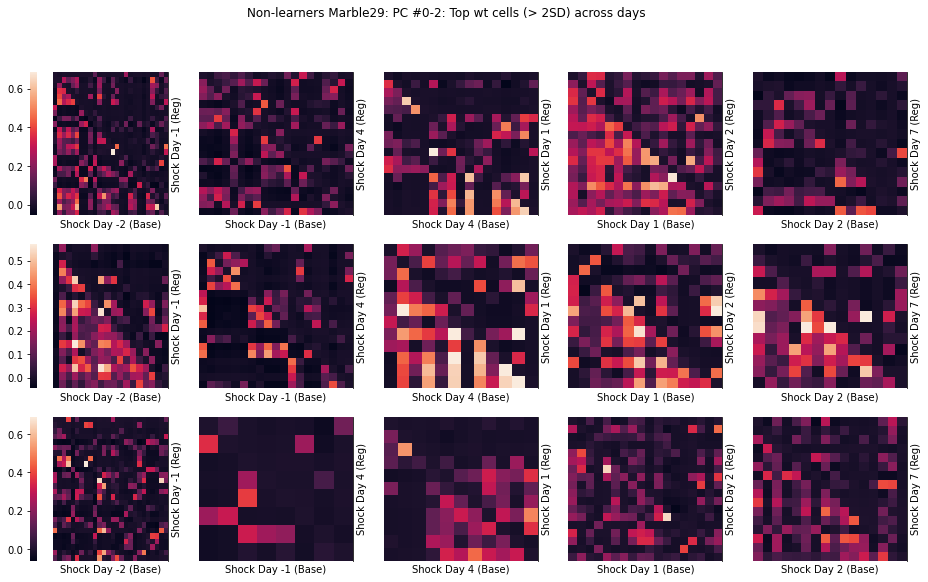

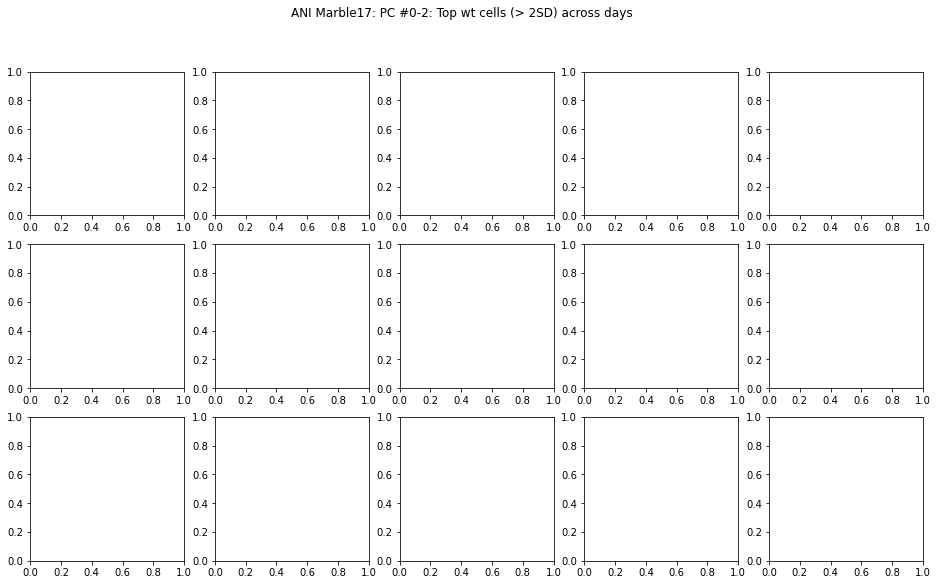

In [6]:
# Plot 1st 3 PCs across days for each mouse.
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

blockPrint()

for group, name in zip(group_plot, group_names):
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2]
        day2 = [-1, 4, 1, 2, 7]
        fig, ax = plt.subplots(nPCs, 5, figsize=(16, 3*nPCs))
        fig.suptitle(name + ' ' + mouse + ': PC #0-' + str(nPCs-1) + ': Top wt cells (> 2SD) across days')
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
            try:
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                for pc in tqdm(range(nPCs), desc=f'{mouse} PC #{ida}:'):
                    sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                    DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #0', ax=ax[pc, ida], cbar=cbar_bool)

                    # Clean up plots
                    ax[pc, ida].set_title('')
            except FileNotFoundError:
                ax[0, ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[0, ida].text(0.1, 0.5, 'ValueError - check out session')
        
        # Normalize all cbars to 1st plot in each row.
        for arow in ax:
            set_clim(arow, 0)

enablePrint()


# Big question: Are our Learner v Nonlearner groupings appropriate?  Marble29 seems to have a lot of consistency in freezing cells across days - maybe he freezes a lot and just doesn't discriminate between arenas?

ANI: 100%|███████████████████████████████████████████| 5/5 [18:57<00:00, 227.43s/it]


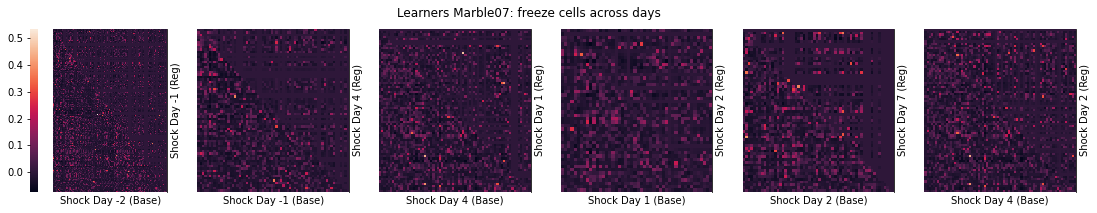

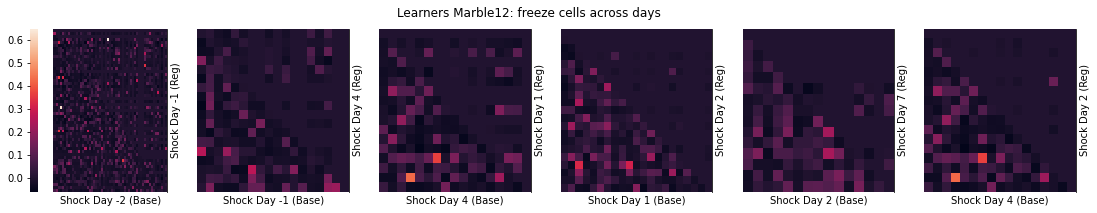

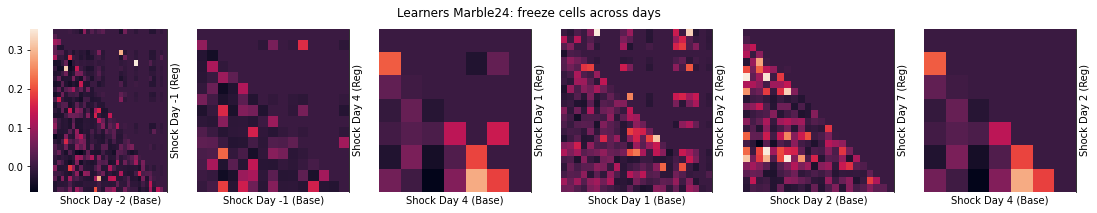

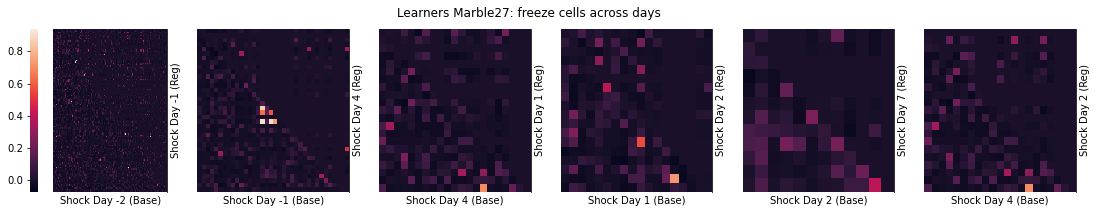

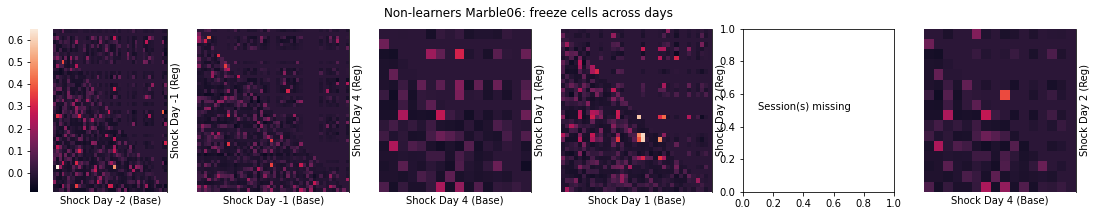

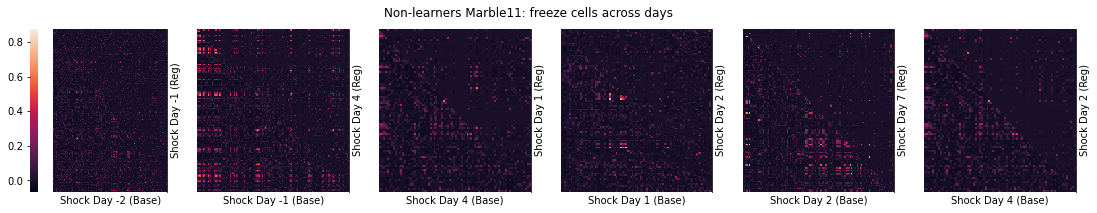

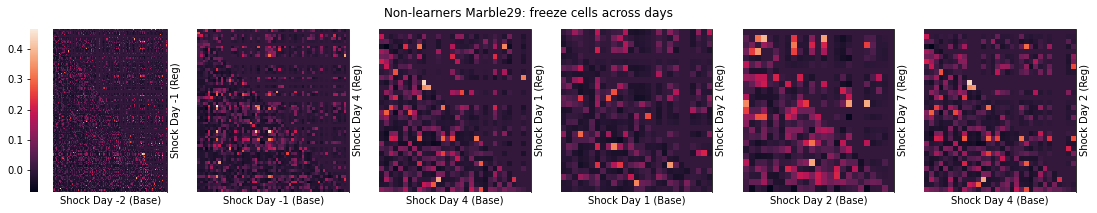

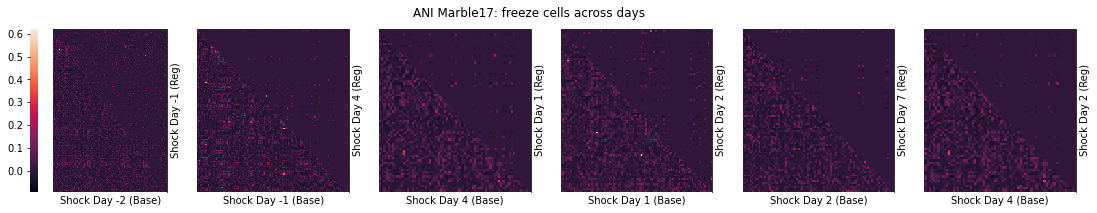

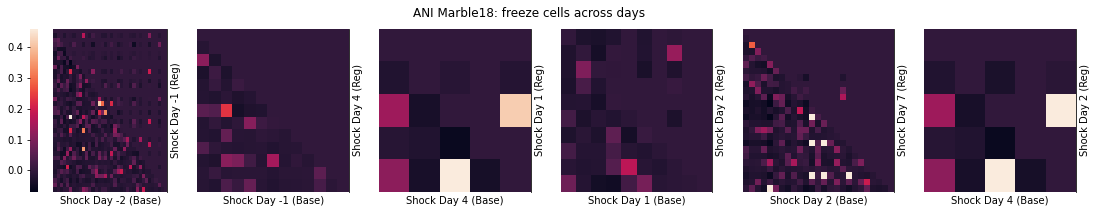

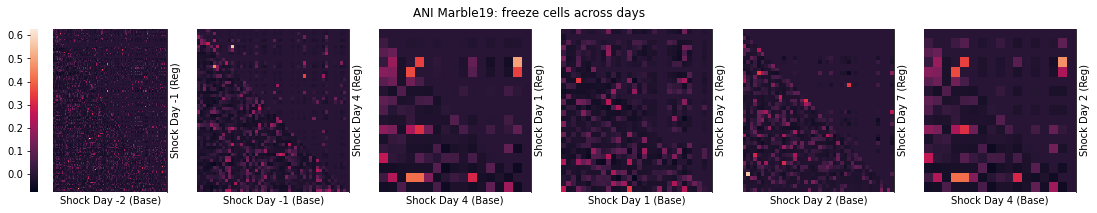

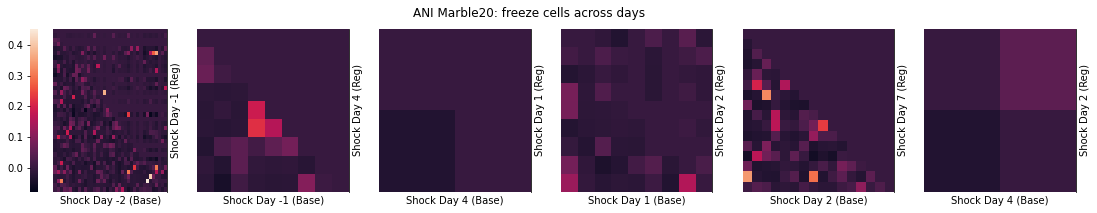

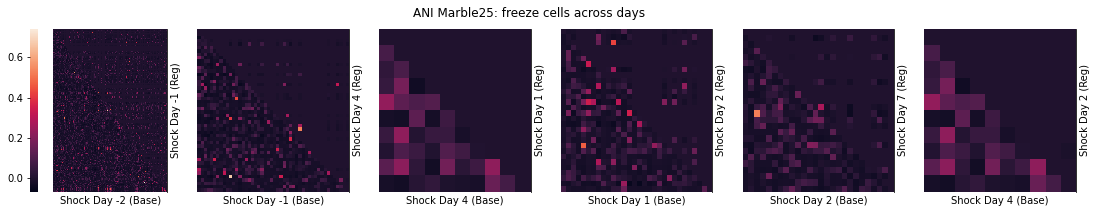

(-0.14175942163947164, 0.7286632591134349)
(0.0, 1.0)
(-0.14175942163947164, 0.7286632591134349)
(0.0, 1.0)
0.04069239979636857
0.08138479959273714
0.08138479959273714
0.08472982718077303
0.12201537164867979
0.10599939209498918
0.08472982718077303
0.08472982718077303
0.10257906994205343
0.10257906994205343
0.10257906994205343
p=0.103 baseline
p_aft=0.0203 day 1-2
p=0.103 baseline
p_aft=0.0203 day 1-2
p=0.103 baseline
p_aft=0.0203 day 1-2
p=0.103 baseline
p_aft=0.0203 day 1-2
0.02025193758455554
p=0.103 baseline
p_aft=0.0203 day 1-2
p=0.103 baseline
p_aft=0.0203 day 1-2
p=0.103 baseline
p_aft=0.0203 day 1-2
test
p=0.103 baseline
p_aft=0.0203 day 1-2
test
p=0.103 baseline b/w groups
p=0.0203 day 1-2 b/w groups
p=0.00361 before-after Ctrl
p=0.0503 before-after ANI
test


In [4]:
# Plot freeze cells across days for each mouse with silent cells
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
# nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in tqdm(group, desc=name):
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(19, 3*1))
        fig.suptitle(name + ' ' + mouse + ': freeze cells across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
#             cov_dict[name][mouse] = {f'{d1}_{d2}' : []}
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
                    
#                     sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                _, covz_comb = DRreg.plot_cov_across_days(neurons='freeze_onset', label='PC #0', ax=ax[ida], cbar=cbar_bool,
                                          keep_silent=True)

                cov_dict[name][mouse][f'{d1}_{d2}'] = covz_comb
                    
                # Clean up plots
                ax[ida].set_title('')
            except FileNotFoundError:
                ax[ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
#         for arow in ax:
            set_clim(ax, 0)

np.save(os.path.join(save_dir, 'freeze_cells_cov_across_days_w_silent.npy'), cov_dict, allow_pickle=True)
freeze_silent_cov_dict = cov_dict.copy()

ANI: 100%|███████████████████████████████████████████| 5/5 [17:09<00:00, 205.80s/it]


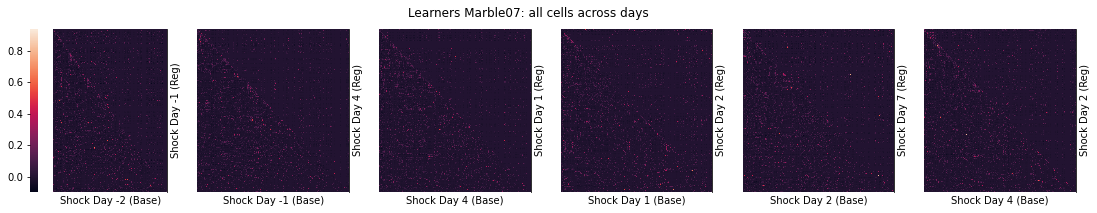

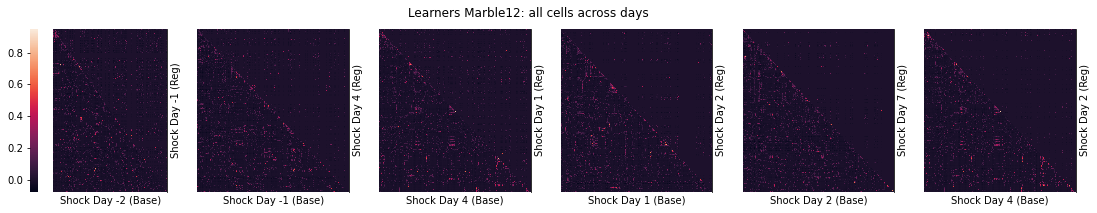

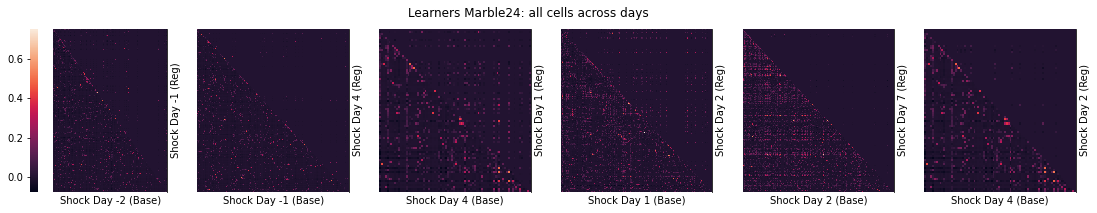

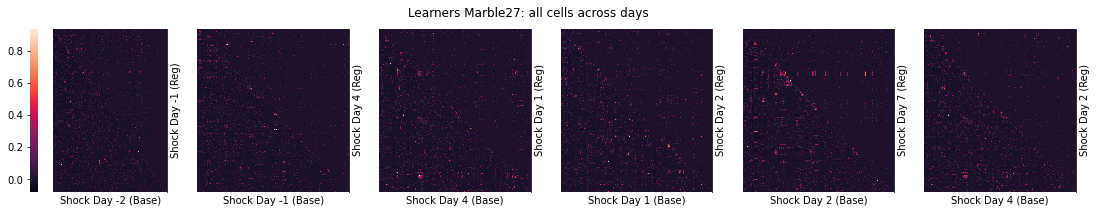

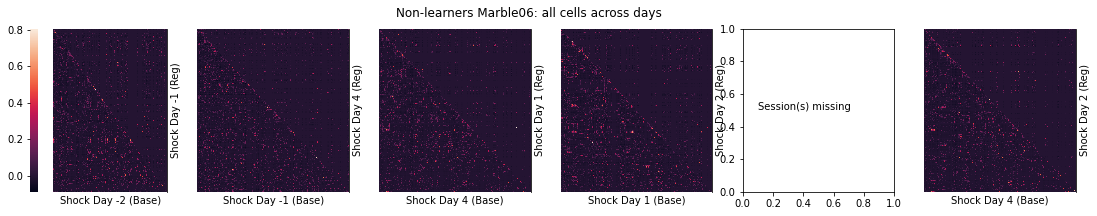

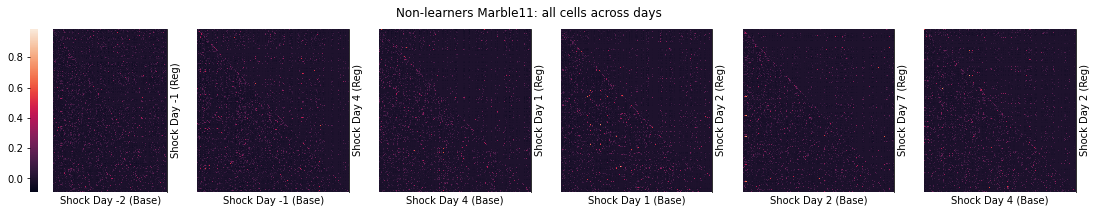

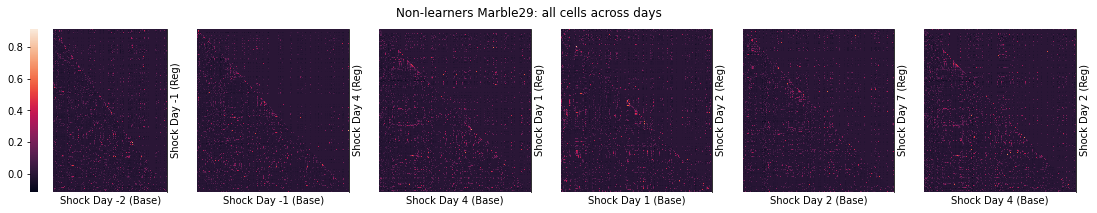

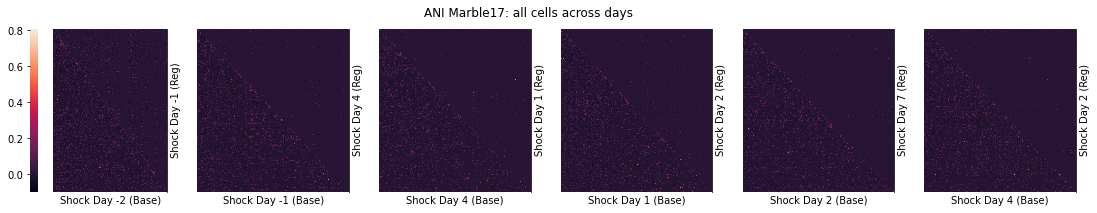

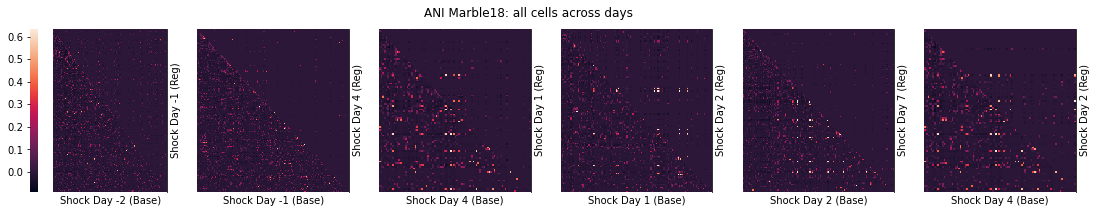

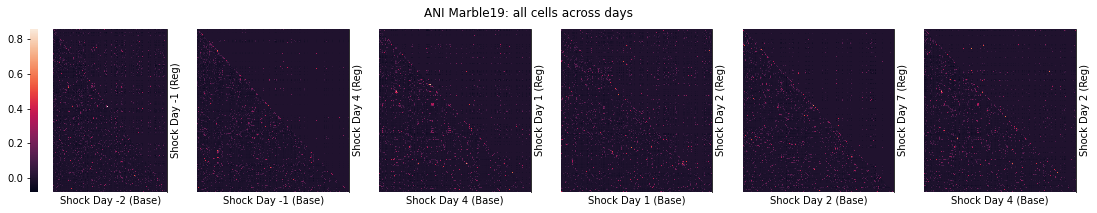

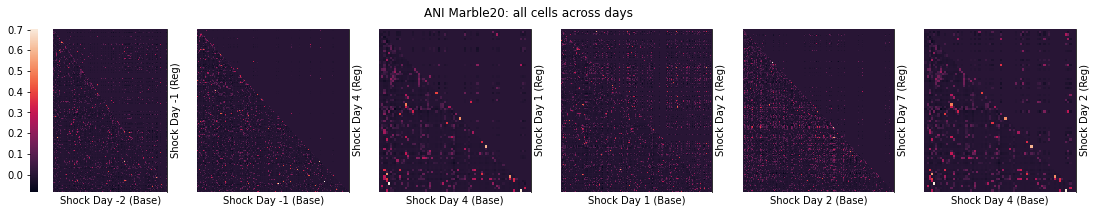

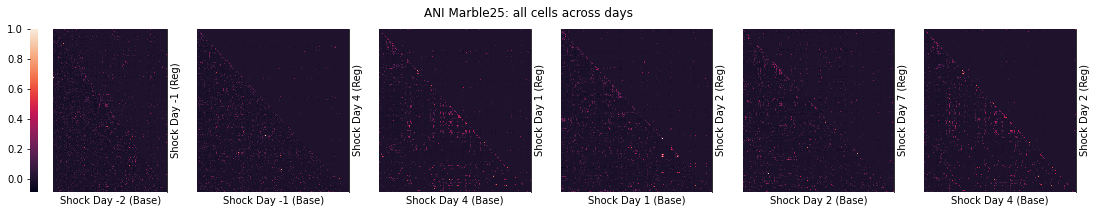

In [5]:
# Plot all cells across days for each mouse with silent cells
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in tqdm(group, desc=name):
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(19, 3*1))
        fig.suptitle(name + ' ' + mouse + ': all cells across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
#             cov_dict[name][mouse][f'{d1}_{d2}'] = []
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
#                 for pc in range(nPCs):
                    
#                     sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                _, covz_comb = DRreg.plot_cov_across_days(neurons='all', label='PC #0', ax=ax[ida], 
                                                         cbar=cbar_bool, keep_silent=True)

                cov_dict[name][mouse][f'{d1}_{d2}'] = covz_comb
                    
                    # Clean up plots
                ax[ida].set_title('')
            except FileNotFoundError:
                ax[ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
#         for arow in ax:
        set_clim(ax, 0)
    
np.save(os.path.join(save_dir, 'all_cells_cov_across_days.npy'), cov_dict, allow_pickle=True)
all_cov_dict = cov_dict.copy()


mouse: 6it [04:08, 41.40s/it]
mouse: 6it [01:20, 13.41s/it]
mouse: 6it [01:54, 19.11s/it]
mouse: 6it [02:26, 24.38s/it]
mouse: 6it [02:37, 26.27s/it]
mouse: 6it [34:15, 342.57s/it]
mouse: 6it [04:41, 46.91s/it]
mouse: 6it [15:29, 154.99s/it]
mouse: 6it [00:37,  6.17s/it]
mouse: 6it [03:33, 35.59s/it]
mouse: 6it [00:32,  5.49s/it]
mouse: 6it [06:05, 60.96s/it] 


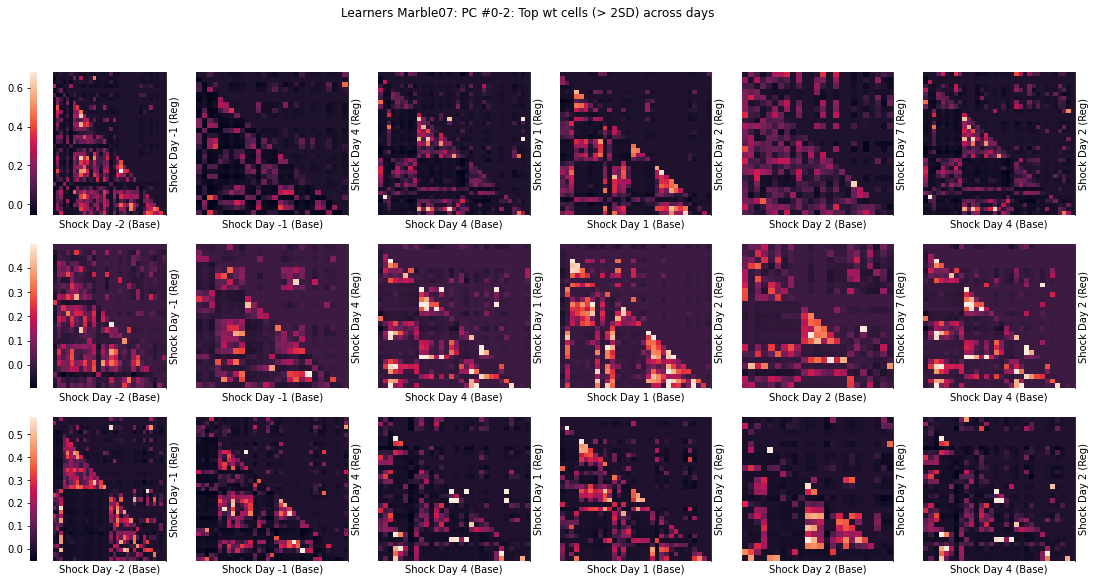

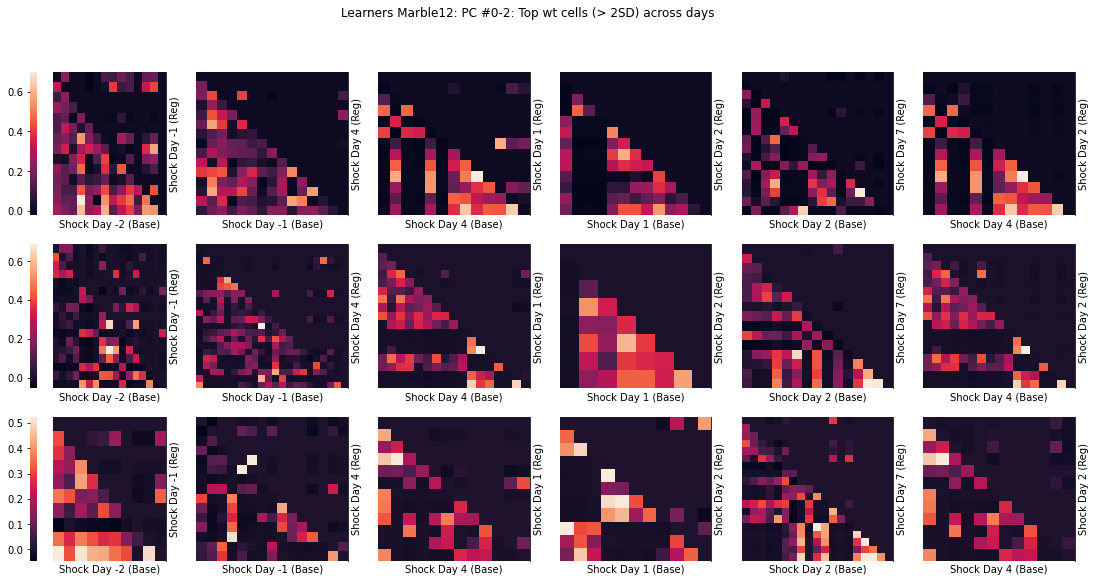

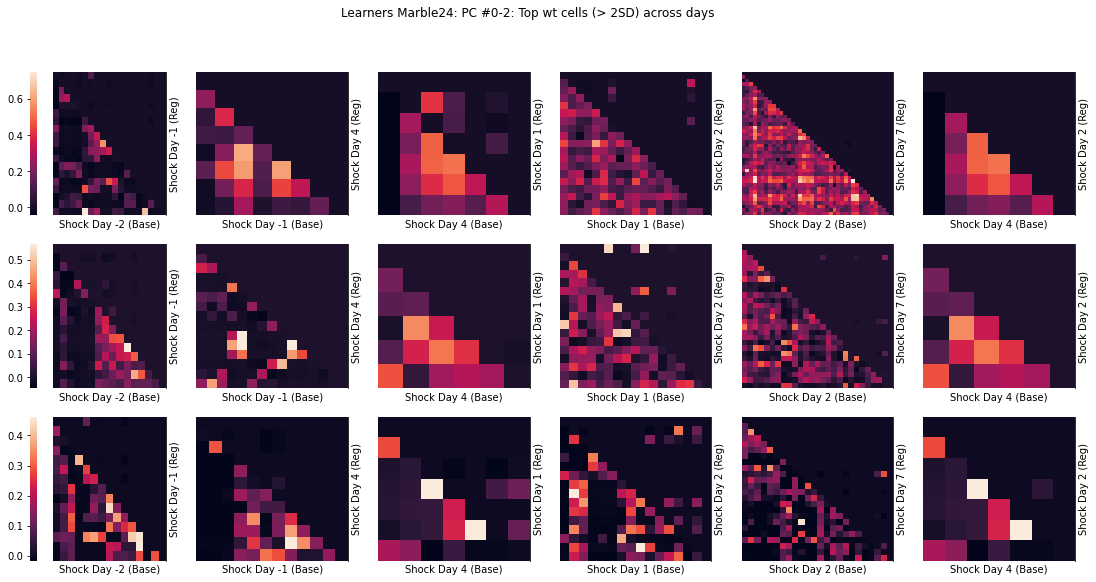

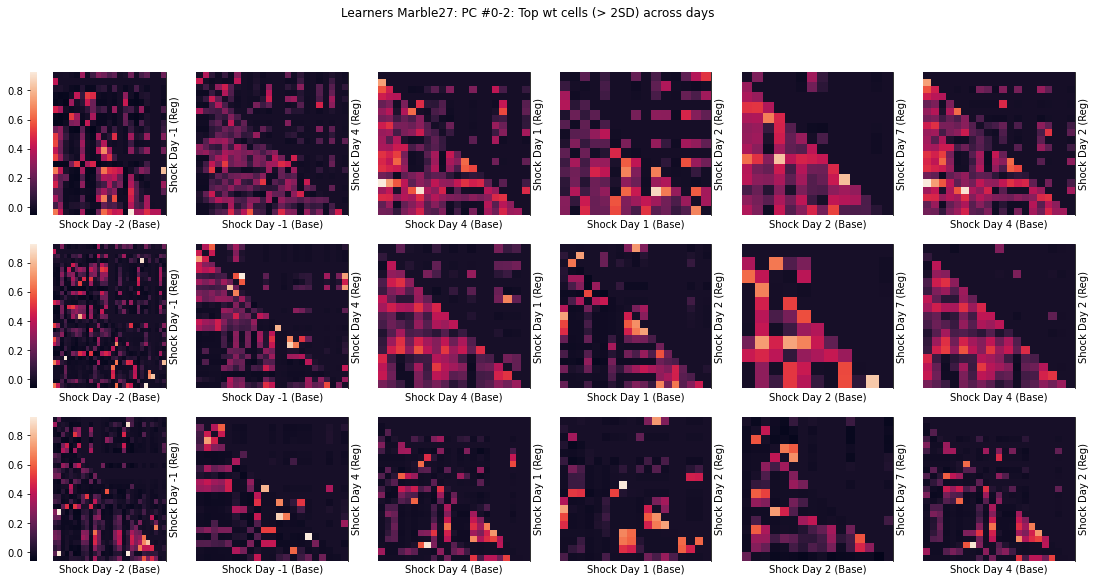

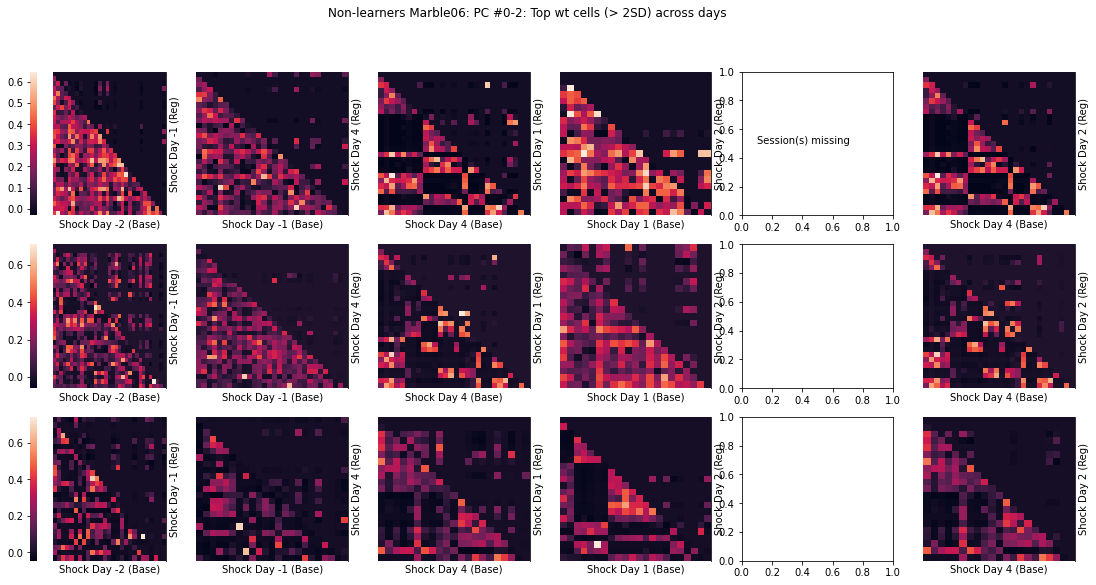

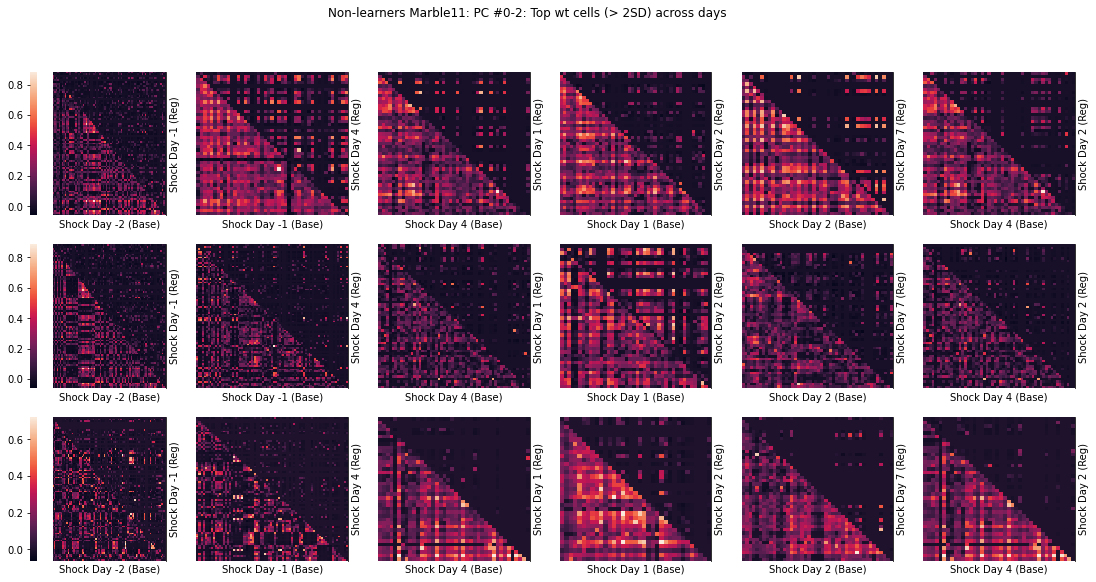

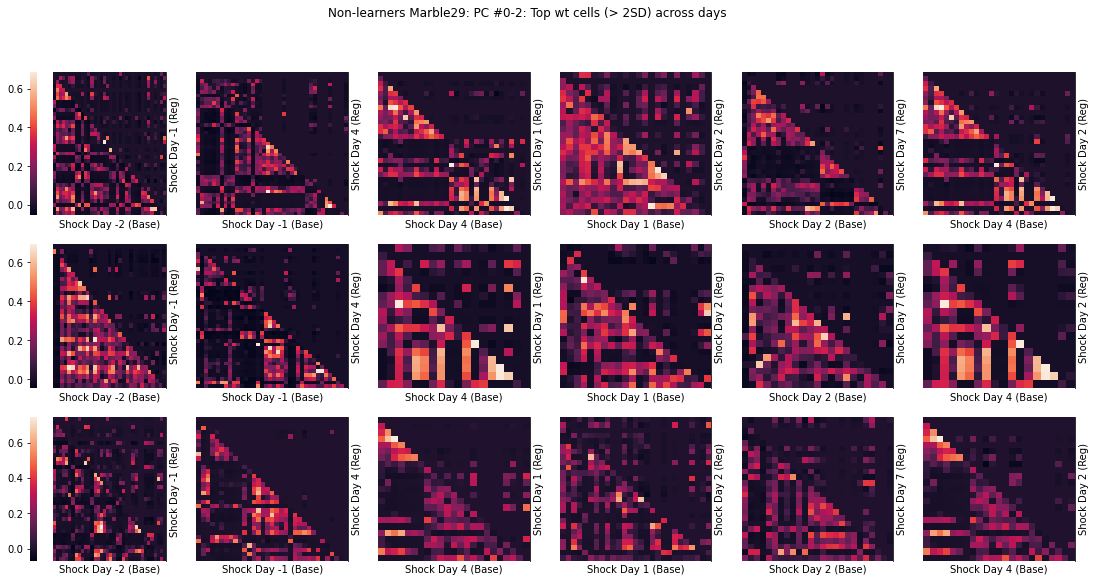

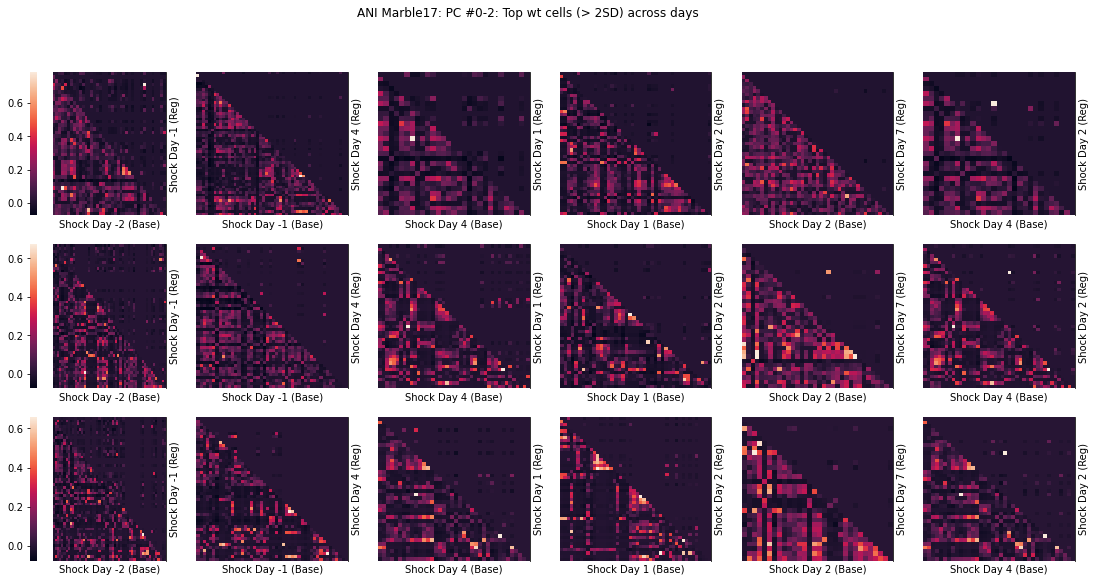

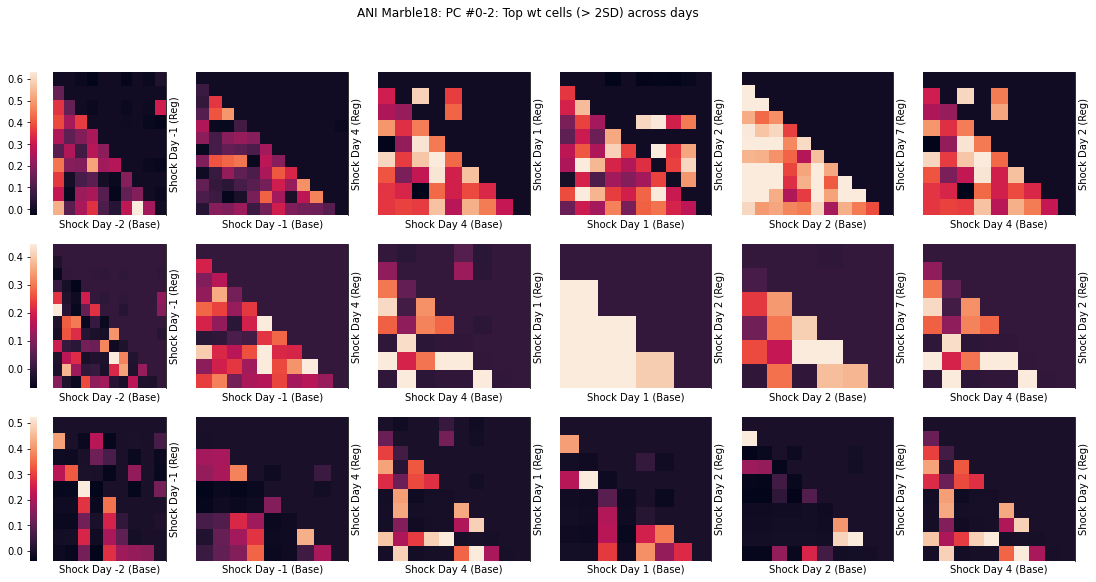

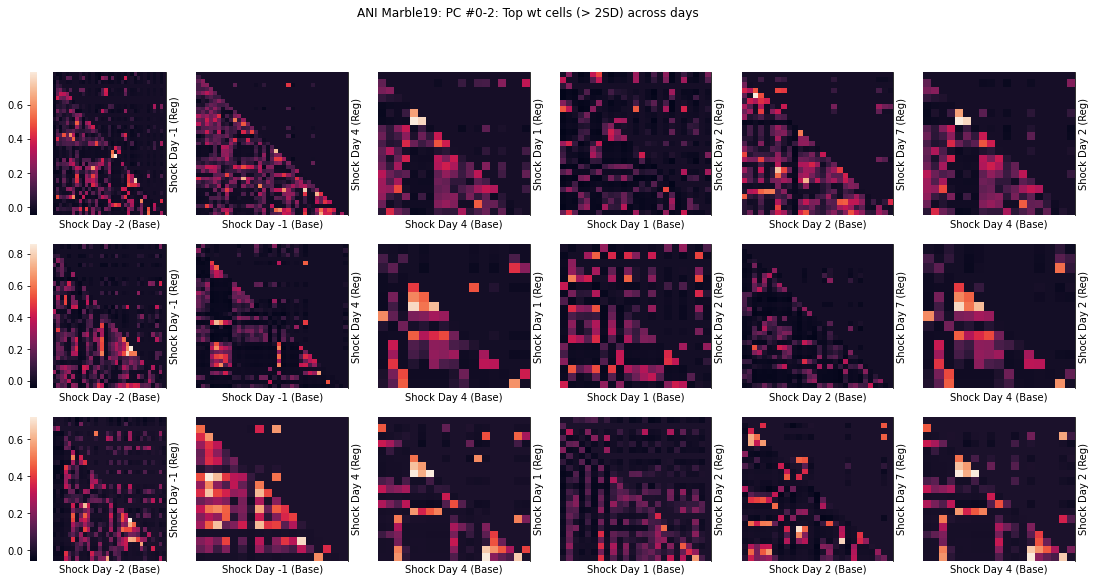

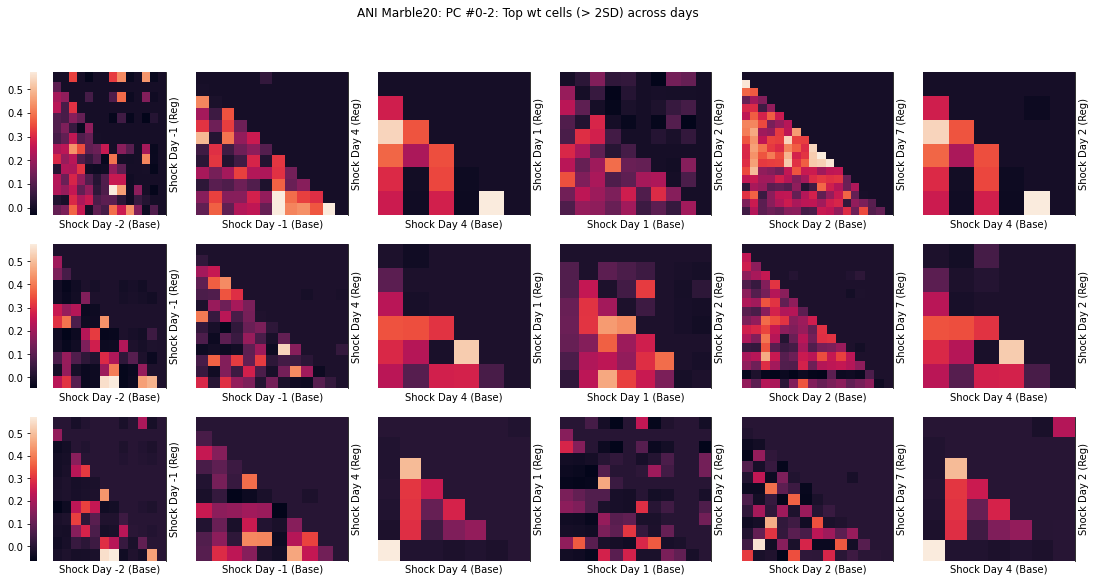

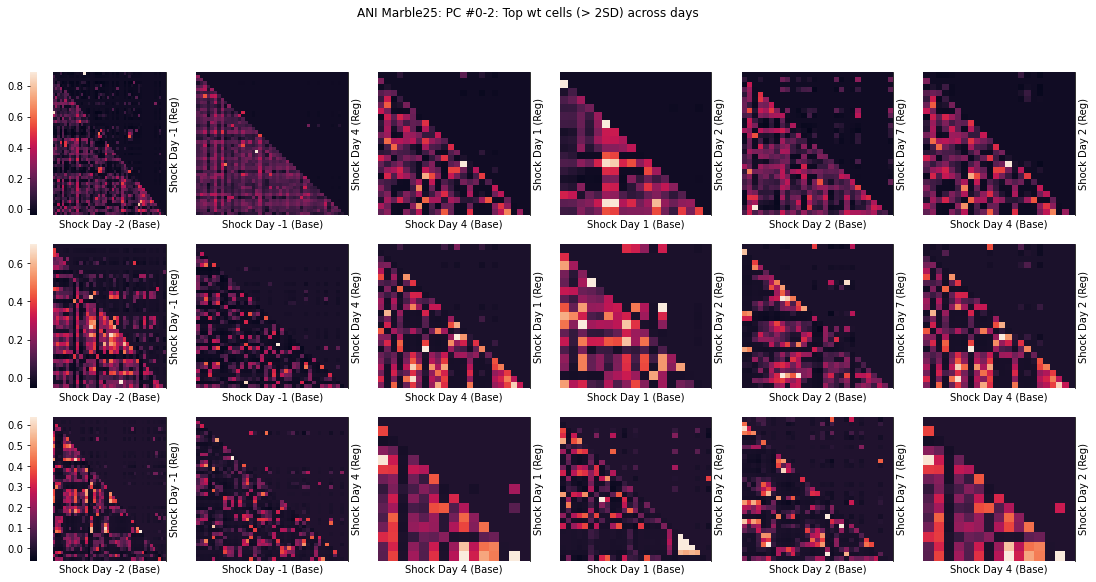

In [14]:
# Plot 1st 3 PCs across days for each mouse with silent cells - High wt cells only
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(nPCs, 6, figsize=(19, 3*nPCs))
        fig.suptitle(name + ' ' + mouse + ': PC #0-' + str(nPCs-1) + ': Top wt cells (> 2SD) across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in tqdm(enumerate(zip(day1, day2)), desc='mouse'):
            cbar_bool = ida == 0
            cov_dict[name][mouse][f'{d1}_{d2}'] = []
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
                for pc in range(nPCs):
                    
                    sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                    _, covz_comb = DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #0', ax=ax[pc, ida], cbar=cbar_bool,
                                              keep_silent=True)
                    
                    cov_dict[name][mouse][f'{d1}_{d2}'].append(covz_comb)
                    
                    # Clean up plots
                    ax[pc, ida].set_title('')
            except FileNotFoundError:
                ax[0, ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[0, ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
        for arow in ax:
            set_clim(arow, 0)

np.save(os.path.join(save_dir, 'pca_cov_across_days.npy'), cov_dict, allow_pickle=True)
pca_cov_dict = cov_dict.copy()

Calculating Dupret activations from raw calcium activity
Calculating Dupret activations from raw calcium activity


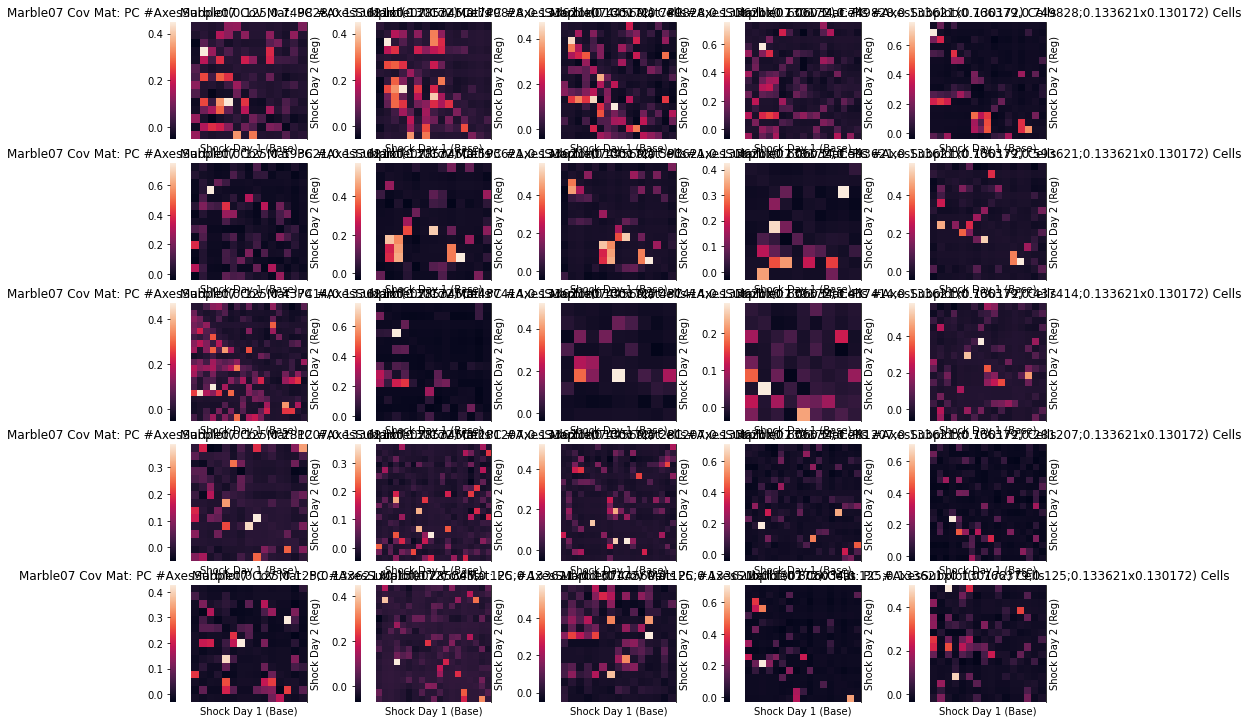

In [14]:
# Plot All PCs across days for one mouse
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
mouse = 'Marble07'
d1 = 1
d2 = 2
DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
ncols = 5
nrows = np.ceil(DRreg.DRbase.nA/ncols).astype(int)
fig, ax = plt.subplots(nrows , ncols, figsize=(3.2*ncols, 2.5*nrows))
fig.suptitle(mouse + " PC Cov. Mat across days")
for ida, a in enumerate(ax.reshape(-1)):
    sig_wts = np.where(DRreg.DRbase.pca.df[ida].abs() > DRreg.DRbase.pca.df[ida].std()*2)[0]
    DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #' + str(ida), ax=a)
    a.set_title('PC # ' + str(ida))
